In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the cleaned dataset
file_path = "/content/drive/MyDrive/Final Project/data/US_Accidents_Sample.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Confirm successful load
print(df.head())

Mounted at /content/drive
   Severity  Start_Time    End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  \
0         3  1454910360  1454929200  39.865147 -84.058723  -9999.0  -9999.0   
1         2  1454911679  1454913479  39.928059 -82.831184  -9999.0  -9999.0   
2         2  1454914167  1454915967  39.063148 -84.032608  -9999.0  -9999.0   
3         3  1454916214  1454918014  39.747753 -84.205582  -9999.0  -9999.0   
4         2  1454917147  1454918947  39.627781 -84.188354  -9999.0  -9999.0   

   Distance(mi)  Weather_Timestamp  Temperature(F)  ...  \
0          0.01         1454911080            36.9  ...   
1          0.01         1454910660            37.9  ...   
2          0.01         1454914560            36.0  ...   
3          0.01         1454917080            35.1  ...   
4          0.01         1454917980            36.0  ...   

   Wind_Chill(F)_Missing  End_Lng_Missing  End_Lat_Missing  \
0                      1                1                1   
1                   

#Train the model

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Severity'])  # Features
y = df['Severity']  # Target

# One-hot encode the target variable
y = to_categorical(y - 1, num_classes=4)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation
history = model.fit(X_train, y_train, epochs=1500, validation_data=(X_val, y_val), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5832 - loss: 0.8787 - val_accuracy: 0.6130 - val_loss: 0.6422
Epoch 2/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6446 - loss: 0.6334 - val_accuracy: 0.6260 - val_loss: 0.6402
Epoch 3/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6511 - loss: 0.6161 - val_accuracy: 0.6500 - val_loss: 0.6208
Epoch 4/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6573 - loss: 0.6054 - val_accuracy: 0.6790 - val_loss: 0.6047
Epoch 5/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6945 - loss: 0.5782 - val_accuracy: 0.7160 - val_loss: 0.5918
Epoch 6/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6855 - loss: 0.5745 - val_accuracy: 0.6900 - val_loss: 0.5779
Epoch 7/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6883 - loss: 0.5769 - val_accuracy: 0.6890 - val_loss: 0.6029
Epoch 8/1500
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7038 - loss: 0.5653 - 

NameError: name 'plt' is not defined

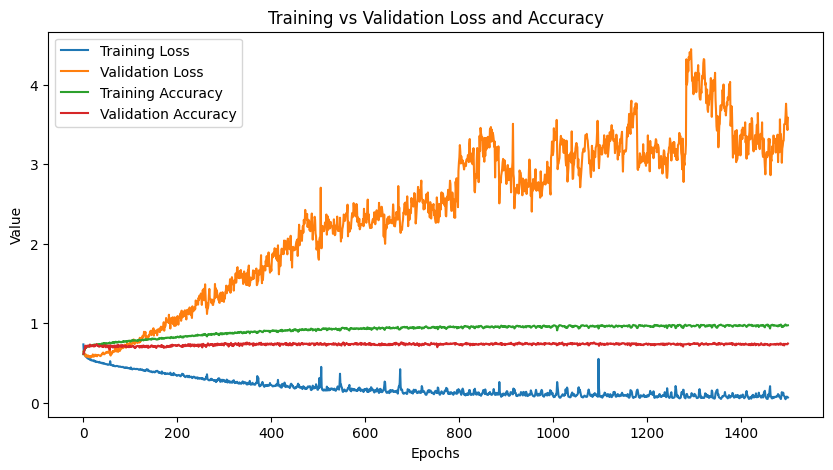

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [12]:
# Print final values for training and validation loss and accuracy
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_training_loss}")
print(f"Final Validation Loss: {final_validation_loss}")
print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

Final Training Loss: 0.06344607472419739
Final Validation Loss: 3.581778049468994
Final Training Accuracy: 0.9725000262260437
Final Validation Accuracy: 0.7429999709129333


In [10]:
 %%shell
 jupyter nbconvert --to html "/content/drive/MyDrive/Final Project/Phase 2/Phase 2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Final Project/Phase 2/Phase 2.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][2]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stderr',
 'output_type': 'stream',
 'text': '/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/de...'}
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 731303 bytes to /content/drive/MyDrive/Final Project/Phase 2/Phase 2.html
